# Breast Cancer Wisconsin - Diagnostic Dataset Analysis


### Group Members
- Group member 1
    - Name: Mattock Callahan
    - Email: mc4366@drexel.edu
- Group member 2
    - Name: Nawaf Alhumaid
    - Email: nka39@drexel.edu
- Group member 3
    - Name: Ifeanyi Osuchukwu
    - Email: imo27@drexel.edu
- Group member 4
    - Name: Himanshu Rathod
    - Email: hr399@drexel.edu

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
from IPython.display import display, Markdown, Latex
from pprint import pprint
from sklearn.metrics import *
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from collections import defaultdict

pd.set_option('display.max_columns', None)

___
## Pre-Processing

### Load, Clean, & Standardize Data

In [2]:
# Load
df = pd.read_csv('data.csv')
display(df.head())

# Clean
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)
df['diagnosis'] = [1 if row[1]['diagnosis'] == 'M' else 0 for row in df.iterrows()]
display(df.head())

# Standardize
features = list(df.columns)
features.remove('diagnosis')
for col in features:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
display(df.head())

y = df['diagnosis']
x = df.loc[:, df.columns != 'diagnosis']

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


___
## Visualizing the Data

### Correlation Matrix

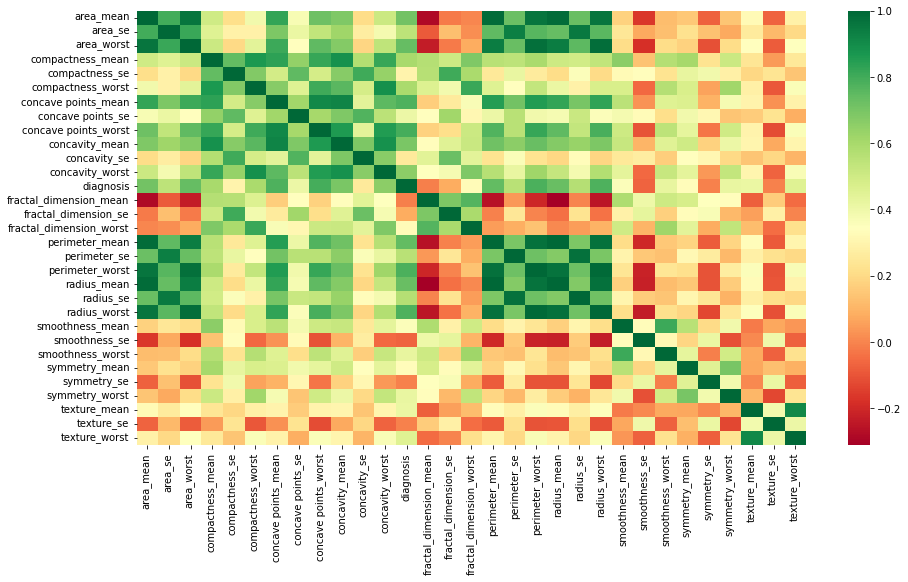

In [3]:
corr = df.sort_index(axis=1).corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap="RdYlGn")
plt.show()

### Features Visualized via Box Plots

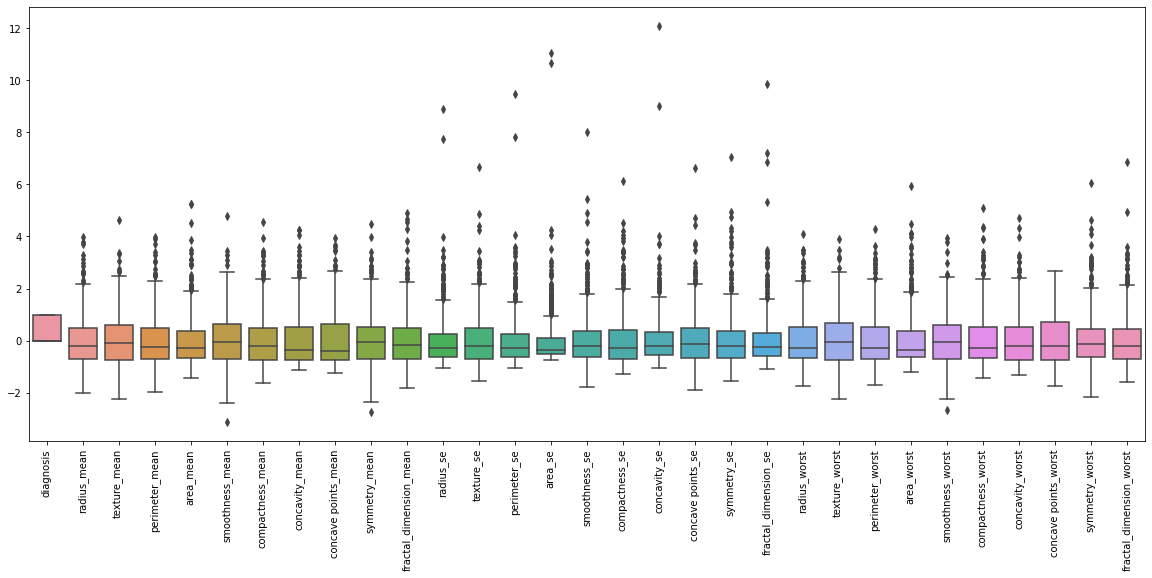

In [4]:
plt.figure(figsize=(20,8))
chart = sns.boxplot(data=df)
chart.set_xticklabels(labels=df.columns, rotation=90)
plt.show()

### Histogram Analysis: Benign vs. Malignant Tumors Across Features

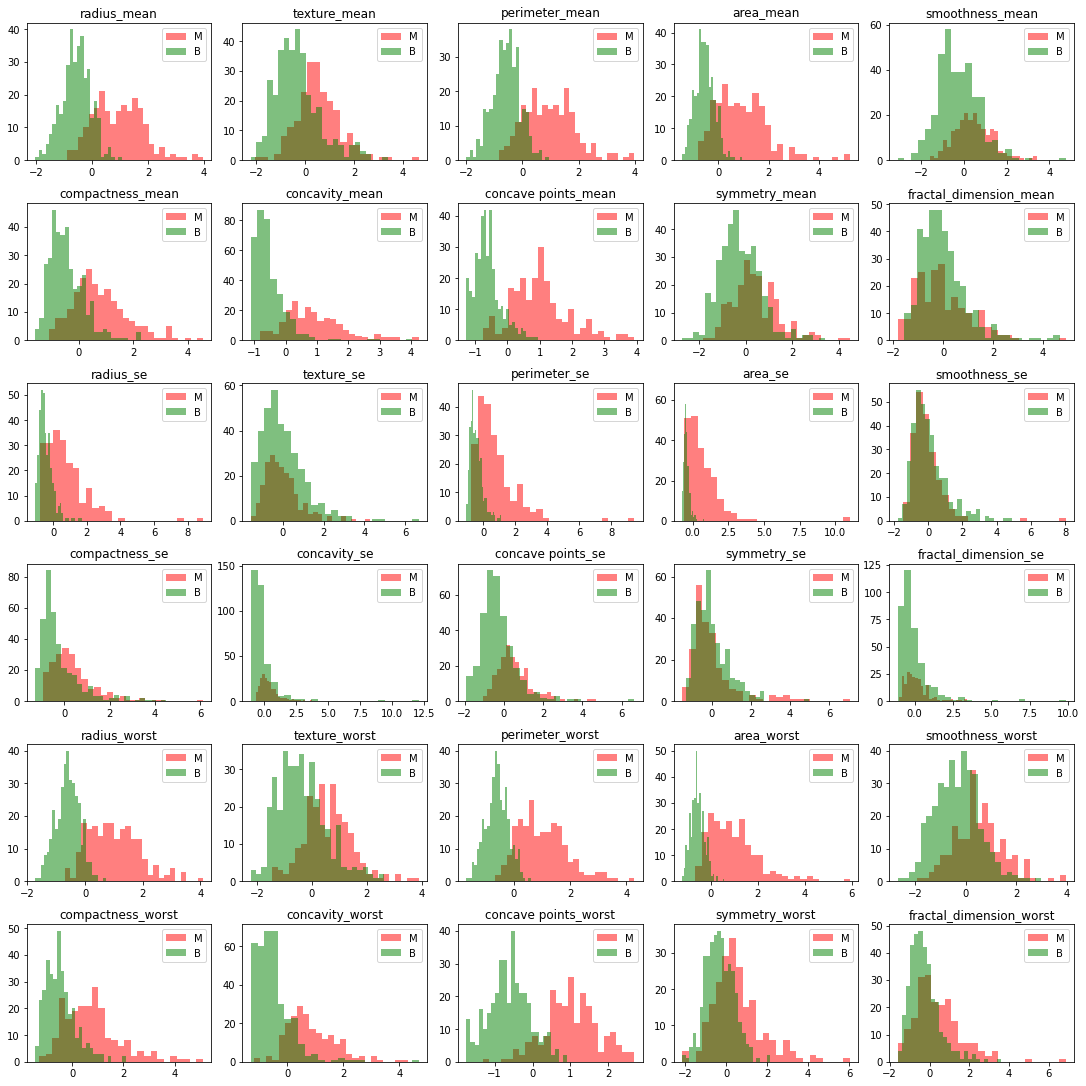

In [5]:
subplot_columns = 5
subplot_rows = 6
f, axs = plt.subplots(subplot_rows,subplot_columns,figsize=(15,15))

num = 1
for column in df.columns:
    if df[column].dtypes != 'float64':
        continue
    
    bins = 25
    plt.subplot(subplot_rows,subplot_columns,num)
    # plt.hist(df[column], bins=25, alpha=0.0, label='A', color='b')
    plt.hist(df[df['diagnosis'] == 1][column], bins=bins, alpha=0.5, label='M', color='r')
    plt.hist(df[df['diagnosis'] == 0][column], bins=bins, alpha=0.5, label='B', color='g')
    plt.legend(loc='upper right')
    plt.title(column)
    
    num += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Principal Component Analysis

In [6]:
eig_vals, eig_vecs = np.linalg.eig(x.cov())
eig_percents = eig_vals / sum(eig_vals) * 100

sort_ix,  sort_eig_percents = zip(*sorted(enumerate(eig_percents), reverse = True, key = lambda x: x[1]))

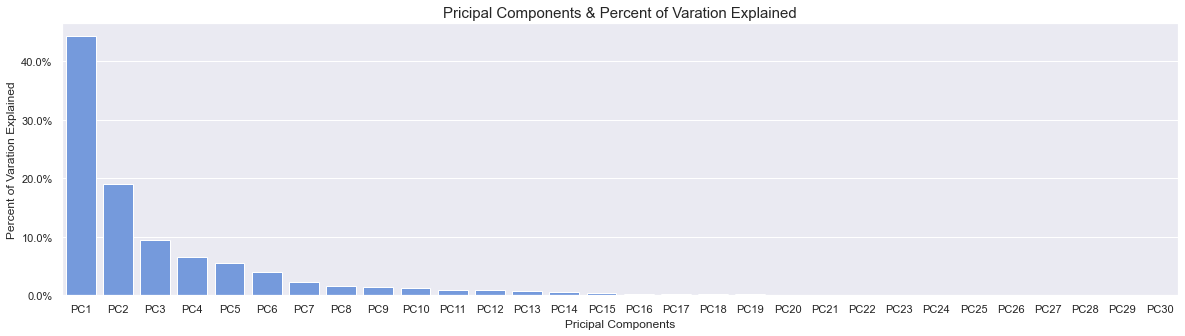

In [7]:
labels = [f'PC{i + 1}' for i,v in enumerate(sort_eig_percents)]
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(x=labels, y=list(sort_eig_percents), color='cornflowerblue')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Pricipal Components & Percent of Varation Explained', fontsize=15)
ax.set_xlabel('Pricipal Components', fontsize=12)
ax.set_ylabel('Percent of Varation Explained', fontsize=12)
plt.show()

___
## Modeling

### Final Data Preparation Steps

#### Create Condensed Feature List with PCA

In [8]:
pca = PCA(n_components=3)
pca.fit(x)
x_ENG = pca.transform(x)
print(x.shape, x_ENG.shape)

(569, 30) (569, 3)


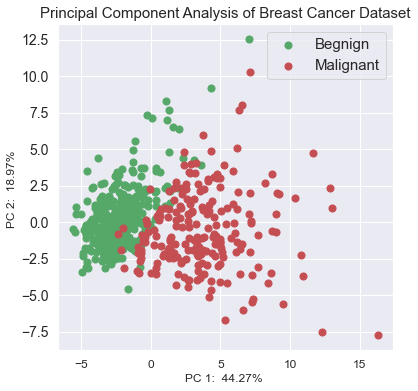

In [9]:
principal_df = pd.DataFrame({"PC1":x_ENG[:,0],"PC2":x_ENG[:,1],})
plt.figure(figsize=(6,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f"PC 1:  {eig_percents[0]:.2f}% " ,fontsize = 12)
plt.ylabel(f"PC 2:  {eig_percents[1]:.2f}% " ,fontsize = 12)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=15)
targets = [0, 1]
colors = ['g','r']
labs = ['Begnign','Malignant']

for target, color, lab in zip(targets,colors,labs):
    indicesToKeep = df['diagnosis'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'PC1'],
                principal_df.loc[indicesToKeep, 'PC2'], c = color, s = 50, label = lab);

plt.legend(prop={'size': 15});
plt.show()

In [10]:
test_size = 0.2
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
x_train_ENG, x_test_ENG, y_train, y_test = train_test_split(x_ENG, y, test_size=test_size, random_state=random_state)

In [11]:
clf_models = [('Logistic Regression', LogisticRegression(solver='lbfgs')),
              ('Random Forest', RandomForestClassifier()),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)),
              ('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=3))]

In [14]:
def run_classifier(classifier, x_train, y_train, x_test, y_test, print_stats=True, cm_status = False):
    '''
    This function returns a classification and confusion matrix for a given classification model
    This function accepts a classifier, training and testing datat as parameters. 
    '''
    
    clf = classifier[1]
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    
    if print_stats==True:
        display(Markdown(f'#### {classifier[0]} \n'))
        print(classification_report(y_test, predictions, target_names=['Benign (0)', 'Malignant (1)']))
        
        scores = cross_val_score(clf, x, y, cv=5)
        print('\nCross-Validation Results:')
        print("\t%0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
   
    if cm_status == True:
        
        cm = confusion_matrix(y_test, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
        disp.plot()
        plt.show()
    
    if classifier[0] == 'Logistic Regression':
        importance = clf.coef_[0]
    elif classifier[0] == 'Random Forest':
        importance = clf.feature_importances_
    elif classifier[0] == 'Gradient Boosting':
        importance = clf.feature_importances_
    else:
        importance = []
    
    return predictions, importance, clf.score(x_test, y_test)

In [15]:
model_num = 1
p,i,a = run_classifier(clf_models[model_num - 1], x_train, y_train, x_test, y_test, print_stats=True)

#### Logistic Regression 


               precision    recall  f1-score   support

   Benign (0)       0.97      0.99      0.98        71
Malignant (1)       0.98      0.95      0.96        43

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114


Cross-Validation Results:
	0.98 accuracy with a standard deviation of 0.01



In [17]:
model_num = 2
p,i,a = run_classifier(clf_models[model_num - 1], x_train, y_train, x_test, y_test, print_stats=True)

#### Random Forest 


               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97        71
Malignant (1)       0.98      0.93      0.95        43

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114


Cross-Validation Results:
	0.96 accuracy with a standard deviation of 0.02



In [18]:
model_num = 3
p,i,a = run_classifier(clf_models[model_num - 1], x_train, y_train, x_test, y_test, print_stats=True)

#### Gradient Boosting 


               precision    recall  f1-score   support

   Benign (0)       0.97      0.97      0.97        71
Malignant (1)       0.95      0.95      0.95        43

     accuracy                           0.96       114
    macro avg       0.96      0.96      0.96       114
 weighted avg       0.96      0.96      0.96       114


Cross-Validation Results:
	0.97 accuracy with a standard deviation of 0.02



In [19]:
model_num = 4
p,i,a = run_classifier(clf_models[model_num - 1], x_train, y_train, x_test, y_test, print_stats=True)

#### KNeighbors Classifier 


               precision    recall  f1-score   support

   Benign (0)       0.96      0.96      0.96        71
Malignant (1)       0.93      0.93      0.93        43

     accuracy                           0.95       114
    macro avg       0.94      0.94      0.94       114
 weighted avg       0.95      0.95      0.95       114


Cross-Validation Results:
	0.96 accuracy with a standard deviation of 0.02



#### Create Function for Flagging Correlated Features

In [ ]:
def correlated(dataset, threshold=0.9):
    '''
    This function returns attributes that are correlated more than a given a threshold
    '''
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                # print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i,j])
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

#### Drop Correlated Features from Core Data

In [ ]:
features_to_drop = correlated(x)
x = x.drop(features_to_drop,axis=1)
print(f'Correlated Features Removed:')
for col in features_to_drop:
    print(f'\t{col}')
    
column_types = defaultdict(list)
for column in x.columns:
    column_types[column.split('_')[0]].append(column)

#### Create Testing & Training Data

In [ ]:
test_size = 0.2
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
x_train_ENG, x_test_ENG, y_train, y_test = train_test_split(x_ENG, y, test_size=test_size, random_state=random_state)

### Function Creation for Testing Flexibility

#### Create Function - Run Single Classifier

In [ ]:
def run_classifier(classifier, x_train, y_train, x_test, y_test, print_stats=True, cm_status = False):
    '''
    This function returns a classification report as well as a confusion matrix for a give classifier model. 
    It takes in a classifier, training and testing data. 
    '''
    
    clf = classifier[1]
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    
    if print_stats==True:
        display(Markdown(f'#### {classifier[0]} \n'))
        print(classification_report(y_test, predictions, target_names=['Benign (0)', 'Malignant (1)']))
        
        scores = cross_val_score(clf, x, y, cv=5)
        print('\nCross-Validation Results:')
        print("\t%0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))
   
    if cm_status == True:
        
        cm = confusion_matrix(y_test, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
        disp.plot()
        plt.show()
    
    if classifier[0] == 'Logistic Regression':
        importance = clf.coef_[0]
    elif classifier[0] == 'Random Forest':
        importance = clf.feature_importances_
    elif classifier[0] == 'Gradient Boosting':
        importance = clf.feature_importances_
    else:
        importance = []
    
    return predictions, importance, clf.score(x_test, y_test)

#### Create Function - Feature Importance

In [ ]:
def feature_importance(x, y, model, test_size=0.2, random_state=42):
    '''
    '''
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    predictions_og, importance_og, score_og = run_classifier(model, x_train, y_train, x_test, y_test)
    precision_og = precision_score(y_test, predictions_og)
    recall_og = recall_score(y_test, predictions_og)
    importance_df = pd.DataFrame(columns = ['model_type', 'feature_type', 'r2_all', 'r2_one', 'r2_diff', 'prec_all', 'prec_one', 'prec_diff', 'prec_diff_pct', 'recall_all', 'recall_one', 'recall_diff', 'recall_diff_pct'])
    for column_type, columns in column_types.items():
        x_imp = x.copy()
        x_imp = x_imp[columns]
        x_train, x_test, y_train, y_test = train_test_split(x_imp, y, test_size=test_size, random_state=random_state)
        predictions_new, importance_new, score_new = run_classifier(model, x_train, y_train, x_test, y_test)
        precision_new = precision_score(y_test, predictions_new)
        recall_new = recall_score(y_test, predictions_new)
        importance_df = importance_df.append({'model_type': model[0],
                                              'feature_type': column_type,
                                              'r2_all': score_og,
                                              'r2_one': score_new,
                                              'r2_diff': score_new - score_og,
                                              'r2_dff_pct': np.NaN,
                                              'prec_all': precision_og,
                                              'prec_one': precision_new,
                                              'prec_diff': precision_new - precision_og,
                                              'prec_diff_pct': np.NaN,
                                              'recall_all': recall_og,
                                              'recall_one': recall_new,
                                              'recall_diff': recall_new - recall_og,
                                              'recall_diff_pct': np.NaN}, ignore_index=True)
    importance_df['r2_dff_pct'] = pd.Series(["{0:.2f}%".format(val * 100) for val in importance_df['r2_diff']], index = importance_df.index)
    importance_df['prec_diff_pct'] = pd.Series(["{0:.2f}%".format(val * 100) for val in importance_df['prec_diff']], index = importance_df.index)
    importance_df['recall_diff_pct'] = pd.Series(["{0:.2f}%".format(val * 100) for val in importance_df['recall_diff']], index = importance_df.index)
    importance_df = importance_df.drop(['r2_all', 'r2_one', 'r2_diff', 'r2_dff_pct'], axis=1)
    display(importance_df.sort_values(by=['recall_diff']))

### Classification Testing (w/o PCA)

In [ ]:
clf_models = [('Logistic Regression', LogisticRegression(solver='lbfgs')),
              ('Random Forest', RandomForestClassifier()),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)),
              ('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=3))]

In [ ]:
model_num = 1
p,i,a = run_classifier(clf_models[model_num - 1], x_train, y_train, x_test, y_test, print_stats=True)

In [ ]:
model_num = 2
p,i,a = run_classifier(clf_models[model_num - 1], x_train, y_train, x_test, y_test, print_stats=True)

In [ ]:
model_num = 3
p,i,a = run_classifier(clf_models[model_num - 1], x_train, y_train, x_test, y_test, print_stats=True)

In [ ]:
model_num = 4
p,i,a = run_classifier(clf_models[model_num - 1], x_train, y_train, x_test, y_test, print_stats=True)

#### Identify Most Important Features Pt. 1

In [ ]:
predictions, importance, score = run_classifier(clf_models[0], x_train, y_train, x_test, y_test)
ax = sns.barplot(y=importance, x=x.columns, color='cornflowerblue')
ax.set_xticklabels(x.columns, rotation=90)
ax.set_title(f'Feature Importance: {clf_models[0][0]}', fontsize=15)
ax.set_xlabel('Feature', fontsize=12)
ax.set_ylabel('Importance', fontsize=12)
plt.show()

#### Identify Most Important Features Pt. 2

In [ ]:
feature_importance(x, y, clf_models[0], test_size, random_state)

### Classification Testing (w/ PCA)

In [ ]:
model_num = 1
predictions, importance, score = run_classifier(clf_models[model_num - 1], x_train_ENG, y_train, x_test_ENG, y_test, print_stats=True)

In [ ]:
model_num = 2
predictions, importance, score = run_classifier(clf_models[model_num - 1], x_train_ENG, y_train, x_test_ENG, y_test, print_stats=True)

In [ ]:
model_num = 3
predictions, importance, score = run_classifier(clf_models[model_num - 1], x_train_ENG, y_train, x_test_ENG, y_test, print_stats=True)

In [ ]:
model_num = 4
predictions, importance, score = run_classifier(clf_models[model_num - 1], x_train_ENG, y_train, x_test_ENG, y_test, print_stats=True)